In [4]:
library(seminr)
library(readxl)
library(writexl)
library(ggplot2)

# Load data
data <- read.csv('/Users/henrysalgado/Desktop/Coache Data Analysis/october24_forest_imputed_data.csv')

# Measurement Model
measurements <- constructs(
  reflective("Chair_Support", c("q185h", "q185i", "q185j", "q185k", "q215l", "q185l")),
  reflective("Department_feedback_and_Support", c("q215a", "q215b", "q215d", "q215i")),
  reflective("Inst_support", c( "q90c", "q90d", "q90e", "q90f", "q90h")),
  reflective("Relatedness", c("q195a", "q195b", "q195e", "q205a", "q205d", "q205c", "q210c", "q212a")),
  reflective("Competence", c("q45a", "q45c", "q45e")),
  reflective("Volition_Autonomy", c("q60c", "q60d", "q70c", "q70h","q60a")),
  reflective("Teaching_and_Service_Satisfaction", c("q70a", "q70b", "q70e")),
  reflective("Global_Satisfaction", c("q245d", "q250a", "q250b"))
)

# Structural Model
structure <- relationships(
  paths(from = c("Chair_Support", "Department_feedback_and_Support", "Inst_support"),
        to = c("Relatedness", "Volition_Autonomy")),
  paths(from = c("Volition_Autonomy", "Relatedness"),
        to = c("Global_Satisfaction", "Teaching_and_Service_Satisfaction"))
)

# Estimate the SEM model
pls_model <- estimate_pls(data = data, measurement_model = measurements, structural_model = structure)

summary <- summary(pls_model)



Generating the seminr model

All 971 observations are valid.



Collinearity Evaluation in relation to each endogenous construct. The values should be less than 3

In [2]:
summary$vif_antecedents

Relatedness :
                  Chair_Support Department_feedback_and_Support 
                          1.651                           1.842 
                   Inst_support 
                          1.339 

Volition_Autonomy :
                  Chair_Support Department_feedback_and_Support 
                          1.651                           1.842 
                   Inst_support 
                          1.339 

Global_Satisfaction :
Volition_Autonomy       Relatedness 
            1.737             1.737 

Teaching_and_Service_Satisfaction :
Volition_Autonomy       Relatedness 
            1.737             1.737

Let's evaluate the relevance and significnce of structural paths

In [6]:
boot <- bootstrap_model(seminr_model = pls_model, nboot = 1000, seed = 123)

Bootstrapping model using seminr...

SEMinR Model successfully bootstrapped



In [8]:
summary_boot <- (summary(boot))
summary_boot$bootstrapped_paths

,Original Est.,Bootstrap Mean,Bootstrap SD,T Stat.,2.5% CI,97.5% CI
Chair_Support -> Volition_Autonomy,0.28813377,0.28818294,0.03838261,7.5068824,0.21409911,0.3652669
Chair_Support -> Relatedness,0.25619817,0.25620934,0.03697028,6.9298414,0.18075211,0.3280382
Department_feedback_and_Support -> Volition_Autonomy,0.34181635,0.34108697,0.04617339,7.4028866,0.25050285,0.4272783
Department_feedback_and_Support -> Relatedness,0.54853030,0.54871552,0.03986495,13.7597135,0.47020254,0.6267459
Inst_support -> Volition_Autonomy,0.35587205,0.35740081,0.03928822,9.0579833,0.28098761,0.4343644
Inst_support -> Relatedness,0.14910130,0.14788916,0.03857159,3.8655732,0.07183844,0.2233275
Volition_Autonomy -> Global_Satisfaction,0.26444436,0.26642671,0.04625405,5.7172151,0.17558988,0.3574357
Volition_Autonomy -> Teaching_and_Service_Satisfaction,0.72576816,0.73149936,0.06454493,11.2443871,0.59666062,0.8663203
Relatedness -> Global_Satisfaction,0.64559225,0.64377899,0.04263566,15.1420736,0.55893696,0.7249002
Relatedness -> Teaching_and_Service_Satisfaction,0.02275669,0.01713724,0.06945254,0.3276582,-0.12294550,0.1506436


In [9]:
summary_boot$bootstrapped_total_paths

,Original Est.,Bootstrap Mean,Bootstrap SD,T Stat.,2.5% CI,97.5% CI
Chair_Support -> Volition_Autonomy,0.28813377,0.28818294,0.03838261,7.5068824,0.21409911,0.3652669
Chair_Support -> Relatedness,0.25619817,0.25620934,0.03697028,6.9298414,0.18075211,0.3280382
Chair_Support -> Global_Satisfaction,0.24159490,0.24153900,0.02865946,8.4298498,0.18285683,0.2975952
Chair_Support -> Teaching_and_Service_Satisfaction,0.21494854,0.21466840,0.02863946,7.5053288,0.16266990,0.2668136
Department_feedback_and_Support -> Volition_Autonomy,0.34181635,0.34108697,0.04617339,7.4028866,0.25050285,0.4272783
Department_feedback_and_Support -> Relatedness,0.54853030,0.54871552,0.03986495,13.7597135,0.47020254,0.6267459
Department_feedback_and_Support -> Global_Satisfaction,0.44451832,0.44440901,0.03296006,13.4865765,0.38206389,0.5102820
Department_feedback_and_Support -> Teaching_and_Service_Satisfaction,0.26056216,0.25876682,0.03984595,6.5392386,0.17861118,0.3331867
Inst_support -> Volition_Autonomy,0.35587205,0.35740081,0.03928822,9.0579833,0.28098761,0.4343644
Inst_support -> Relatedness,0.14910130,0.14788916,0.03857159,3.8655732,0.07183844,0.2233275


These paths indicate the R^2

In [10]:
summary$paths

,Relatedness,Volition_Autonomy,Global_Satisfaction,Teaching_and_Service_Satisfaction
R^2,0.7041808,0.6879400,0.7454444,0.55228675
AdjR^2,0.7032631,0.6869719,0.7449185,0.55136172
Chair_Support,0.2561982,0.2881338,NA,NA
Department_feedback_and_Support,0.5485303,0.3418163,NA,NA
Inst_support,0.1491013,0.3558720,NA,NA
Volition_Autonomy,NA,NA,0.2644444,0.72576816
Relatedness,NA,NA,0.6455923,0.02275669


In [11]:
summary$fSquare

,Chair_Support,Department_feedback_and_Support,Inst_support,Volition_Autonomy,Relatedness,Global_Satisfaction,Teaching_and_Service_Satisfaction
Chair_Support,0,0,0,0.1425177,0.12198332,0.000000,0.0000000000
Department_feedback_and_Support,0,0,0,0.1689781,0.46145130,0.000000,0.0000000000
Inst_support,0,0,0,0.2702783,0.04864037,0.000000,0.0000000000
Volition_Autonomy,0,0,0,0.0000000,0.00000000,0.116795,0.4998852768
Relatedness,0,0,0,0.0000000,0.00000000,0.695969,-0.0002853487
Global_Satisfaction,0,0,0,0.0000000,0.00000000,0.000000,0.0000000000
Teaching_and_Service_Satisfaction,0,0,0,0.0000000,0.00000000,0.000000,0.0000000000


Now, let's test predictive power

In [12]:
predict_model <-predict_pls(model = pls_model, technique = predict_DA, noFolds = 10, reps = 10)
sumary_predicted <- summary(predict_model)

q245d", "q250a", "q250b

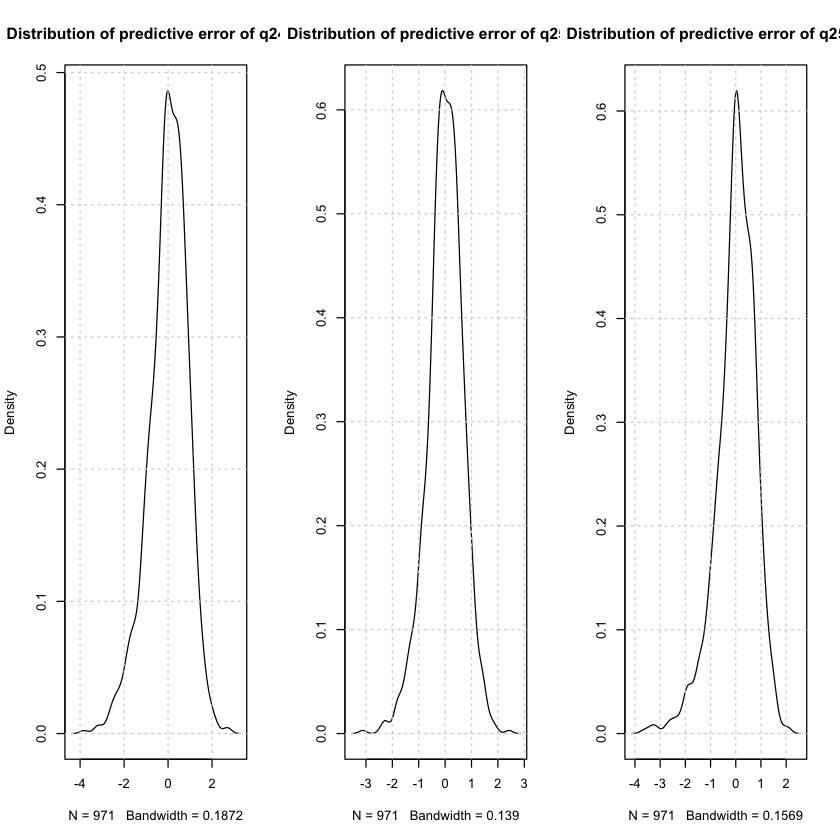

In [13]:
par(mfrow = c(1,3))
plot(sumary_predicted, indicator = "q245d" )
plot(sumary_predicted, indicator = "q250a" )
plot(sumary_predicted, indicator = "q250b" )
par(mfrow = c(1,1))

In [14]:
sumary_predicted


PLS in-sample metrics:
     q195a q195b q195e q205a q205d q205c q210c q212a  q60c  q60d  q70c  q70h
RMSE 0.894 0.753 0.850 0.794 0.824 0.859 0.863 0.861 0.876 0.948 0.853 0.930
MAE  0.683 0.590 0.668 0.627 0.640 0.659 0.672 0.667 0.699 0.768 0.644 0.731
      q60a q245d q250a q250b  q70a  q70b  q70e
RMSE 0.758 0.883 0.672 0.780 0.968 0.848 1.035
MAE  0.596 0.683 0.519 0.585 0.737 0.630 0.843

PLS out-of-sample metrics:
     q195a q195b q195e q205a q205d q205c q210c q212a  q60c  q60d  q70c  q70h
RMSE 0.899 0.756 0.853 0.799 0.827 0.864 0.867 0.865 0.879 0.952 0.856 0.933
MAE  0.686 0.592 0.670 0.630 0.642 0.663 0.675 0.669 0.701 0.771 0.646 0.733
      q60a q245d q250a q250b  q70a  q70b  q70e
RMSE 0.761 0.886 0.675 0.782 0.972 0.855 1.040
MAE  0.598 0.684 0.521 0.586 0.740 0.635 0.846

LM in-sample metrics:
     q195a q195b q195e q205a q205d q205c q210c q212a  q60c  q60d  q70c  q70h
RMSE 0.818 0.689 0.766 0.751 0.754 0.732 0.744 0.779 0.830 0.898 0.754 0.854
MAE  0.640 0.538 0.603 0.58

Model Comparison

In [6]:
# Measurement Model
measurements <- constructs(
  reflective("Chair_Support", c("q185h", "q185i", "q185j", "q185k", "q215l", "q185l")),
  reflective("Department_feedback_and_Support", c("q215a", "q215b", "q215d", "q215i")),
  reflective("Inst_support", c( "q90c", "q90d", "q90e", "q90f", "q90h")),
  reflective("Relatedness", c("q195a", "q195b", "q195e", "q205a", "q205d", "q205c", "q210c", "q212a")),
  reflective("Competence", c("q45a", "q45c", "q45e")),
  reflective("Volition_Autonomy", c("q60c", "q60d", "q70c", "q70h","q60a")),
  reflective("Teaching_and_Service_Satisfaction", c("q70a", "q70b", "q70e")),
  reflective("Global_Satisfaction", c("q245d", "q250a", "q250b"))
)

# Structural Model
structure1 <- relationships(
  paths(from = c("Chair_Support", "Department_feedback_and_Support", "Inst_support"),
        to = c("Relatedness", "Volition_Autonomy")),
  paths(from = c("Volition_Autonomy", "Relatedness"),
        to = c("Global_Satisfaction", "Teaching_and_Service_Satisfaction"))
)

structure2 <- relationships(
  paths(from = c("Chair_Support", "Department_feedback_and_Support", "Inst_support"),
        to = c("Relatedness", "Volition_Autonomy", "Global_Satisfaction", "Teaching_and_Service_Satisfaction")),
  paths(from = c("Volition_Autonomy", "Relatedness"),
        to = c("Global_Satisfaction", "Teaching_and_Service_Satisfaction"))
)


structure3 <- relationships(
  paths(from = c("Chair_Support", "Department_feedback_and_Support", "Inst_support"),
        to = c("Global_Satisfaction", "Teaching_and_Service_Satisfaction")),
  paths(from = c("Global_Satisfaction", "Teaching_and_Service_Satisfaction"),
        to = c("Volition_Autonomy", "Relatedness"))
)

# Estimate the SEM model
pls_model_small <- estimate_pls(data = data, measurement_model = measurements, structural_model = structure1)
pls_model_saturated <- estimate_pls(data = data, measurement_model = measurements, structural_model = structure2)
pls_inverted <- estimate_pls(data = data, measurement_model = measurements, structural_model = structure3)

sum_model1 <- summary(pls_model_small)
sum_model2 <- summary(pls_model_saturated)
sum_model3 <- summary(pls_inverted)

Generating the seminr model

All 971 observations are valid.

Generating the seminr model

All 971 observations are valid.

Generating the seminr model

All 971 observations are valid.



In [7]:
sum_model1$it_criteria["BIC", "Global_Satisfaction"]
sum_model1$it_criteria["BIC", "Teaching_and_Service_Satisfaction"]

[1] -919.4212

[1] -419.7759

In [8]:
sum_model2$it_criteria["BIC", "Global_Satisfaction"]
sum_model2$it_criteria["BIC", "Teaching_and_Service_Satisfaction"]

[1] -1054.774

[1] -529.0104

In [9]:
sum_model3$it_criteria["BIC", "Global_Satisfaction"]
sum_model3$it_criteria["BIC", "Teaching_and_Service_Satisfaction"]

[1] -882.0425

[1] -409.0109

In [10]:
it_criteria_vector <-c(sum_model1$it_criteria["BIC", "Global_Satisfaction"], sum_model2$it_criteria["BIC", "Global_Satisfaction"],sum_model3$it_criteria["BIC", "Global_Satisfaction"])
names(it_criteria_vector) <- c("model1", "model2", "model3")
compute_itcriteria_weights(it_criteria_vector)

model1       model2       model3 
4.060792e-30 1.000000e+00 3.103995e-38

In [11]:
sum_model1$fSquare

,Chair_Support,Department_feedback_and_Support,Inst_support,Volition_Autonomy,Relatedness,Global_Satisfaction,Teaching_and_Service_Satisfaction
Chair_Support,0,0,0,0.1425177,0.12198332,0.000000,0.0000000000
Department_feedback_and_Support,0,0,0,0.1689781,0.46145130,0.000000,0.0000000000
Inst_support,0,0,0,0.2702783,0.04864037,0.000000,0.0000000000
Volition_Autonomy,0,0,0,0.0000000,0.00000000,0.116795,0.4998852768
Relatedness,0,0,0,0.0000000,0.00000000,0.695969,-0.0002853487
Global_Satisfaction,0,0,0,0.0000000,0.00000000,0.000000,0.0000000000
Teaching_and_Service_Satisfaction,0,0,0,0.0000000,0.00000000,0.000000,0.0000000000
